# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [36]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[:500])

<class 'str'>
120253
﻿

***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************



*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE
IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK
(#1533) at https://www.gutenberg.org/ebooks/1533
*********************************


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

In [97]:
tester = '\n \r WORD another word? hyphen-stuff 1. 2. 3. \n\r\n\rThis is a sentence. Name.\n\r\n'
tester = tester.replace('\n', ' ')
tester = tester.replace('\r', ' ')
tester = tester.split(' ')
stripped = [word.strip('1234567890.,!?:; ') for word in tester]
only_words = []
for word in stripped:
    if word != '':
        only_words.append(word.lower())
only_words

['word',
 'another',
 'word',
 'hyphen-stuff',
 'this',
 'is',
 'a',
 'sentence',
 'name']

Text(0, 0.5, 'Word Count')

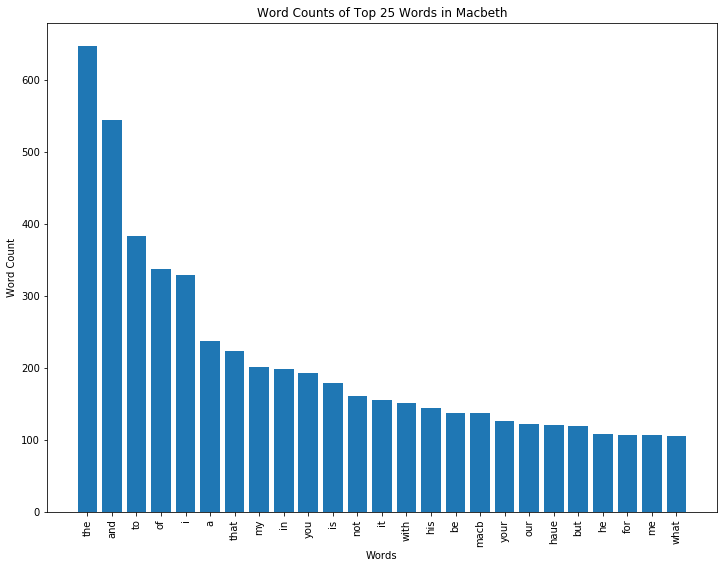

In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here

#remove introductory notes
just_the_play = macbeth.rsplit('David Reed')[1]

# Remove line breaks, split the transcript into words, and clean it up
no_breaks = ' '.join(just_the_play.split())
split_up = no_breaks.split()
all_lower = [word.lower() for word in split_up]
no_punct = [word.strip('.,!?') for word in all_lower]
all_words = [word for word in no_punct if word.isalpha()]

# Initialize a dictionary with a count of 0 for each word
word_data = {}
for word in all_words:
    if word not in word_data.keys():
        word_data[word] = 0
        
# Update word counts by iterating through words
for word in all_words:
    word_data[word] += 1

# Sort words by counts in descending order
word_counts = sorted(word_data.items(), key = lambda word: word[1], reverse=True)

# Separate out data for graphing
words = [word[0] for word in word_counts[:25]]
counts = [word[1] for word in word_counts[:25]]
x = list(range(len(words)))
# Create Bar Graph
fig, ax = plt.subplots(figsize=(12,9))
ax.bar(x, counts, tick_label=words)
plt.xticks(rotation = 90)

# Include descriptive titles and labels
ax.set_title('Word Counts of Top 25 Words in Macbeth')
ax.set_xlabel('Words')
ax.set_ylabel('Word Count')

In [99]:
# Using online list of character names, adapted for how they are spelled in the text
# Iterate through text and count times each character is mentioned
character_names = ['macbeth', 'lady', 'banquo', 'duncan', 'macduff',\
                   'malcolm', 'hecat', 'fleance', 'lenox', 'ross', 'porter',\
                   'donalbain', 'wife']
char_mentions = {}
for char in character_names:
    char_mentions[char] = 0

lowered = just_the_play.lower()

for name in character_names:
    length = len(name)
    for index in list(range(len(lowered))):
        if index <= (len(lowered) - length):
            if name == lowered[index:(index+length)]:
                char_mentions[name] += 1
char_mentions
sort_char = sorted(char_mentions.items(), key = lambda word: word[1], reverse=True)
sort_char

[('macbeth', 66),
 ('ross', 52),
 ('lady', 49),
 ('banquo', 40),
 ('wife', 34),
 ('macduff', 28),
 ('lenox', 28),
 ('duncan', 16),
 ('malcolm', 16),
 ('donalbain', 7),
 ('porter', 5),
 ('fleance', 4),
 ('hecat', 3)]

In [109]:
# Split by character talking
split_by_rn = just_the_play.split('\r\n')

remove_empty = []
for item in split_by_rn:
    if item:
        remove_empty.append(item.strip())
remove_empty[:500]

['The Tragedie of Macbeth',
 'Actus Primus. Scoena Prima.',
 'Thunder and Lightning. Enter three Witches.',
 '1. When shall we three meet againe?',
 'In Thunder, Lightning, or in Raine?',
 "2. When the Hurley-burley's done,",
 "When the Battaile's lost, and wonne",
 '3. That will be ere the set of Sunne',
 '1. Where the place?',
 '2. Vpon the Heath',
 '3. There to meet with Macbeth',
 '1. I come, Gray-Malkin',
 'All. Padock calls anon: faire is foule, and foule is faire,',
 'Houer through the fogge and filthie ayre.',
 'Exeunt.',
 'Scena Secunda.',
 'Alarum within. Enter King, Malcome, Donalbaine, Lenox, with',
 'attendants, meeting a bleeding Captaine.',
 'King. What bloody man is that? he can report,',
 'As seemeth by his plight, of the Reuolt',
 'The newest state',
 'Mal. This is the Serieant,',
 'Who like a good and hardie Souldier fought',
 "'Gainst my Captiuitie: Haile braue friend;",
 'Say to the King, the knowledge of the Broyle,',
 'As thou didst leaue it',
 'Cap. Doubtfull it

In [130]:
joined_lines = []
for i in list(range(len(remove_empty))):
    found_space = False
    found_period = False
    for j in list(range(len(remove_empty[i]))):
        if remove_empty[i][j] == ' ':
            found_space = True
        if remove_empty[i][j] == '.':
            found_period = True
        if found_period:
            if found_space:
                if len(joined_lines) > 0:
                    joined_lines[-1] = joined_lines[-1] + remove_empty[i]
                    found_space = False
                    found_period = False
                    break
            else:
                if len(joined_lines) > 0:
                    joined_lines[-1] = joined_lines[-1] + '$$$'
                joined_lines.append(remove_empty[i])
                found_space = False
                found_period = False
                break

char_names = []
for i in list(range(len(joined_lines))):
    char_names.append(joined_lines[i].split('.', 1)[0].lower())
unique_names = list(set(char_names))
not_chars = ['flourish', '']
all_names = ['soldier', 'macduff', 'banquo', 'messenger', 'malcolme', 'lords', 'lady macbeth',\
            'lord', 'lady macduff', 'seyward', 'witch 1', 'witch 2', 'witch 3', 'rosse', 'captain',\
            'servant', 'murtherer', 'lady with taper', 'angus', 'gentlewoman',\
            'young seyward', 'doctor', 'hecat', 'king duncan', 'porter', 'macduffs son',\
            'cathnes']
character_lines = [{'name':}]

# I could continue mapping out all the characters, and assigning lines to them
# And then analyze that. But I ran out of time, and the text is so messy that I can tell
# that it would take hours and hours to parse it. The numbers (for witches and apparitions)
# don't use consistent periods, and the abbreviations are misleading (mac for macbeth and macduff)
# I gave it a shot!

['sold',
 'macd',
 'flourish',
 'ban',
 'mess',
 'mal',
 'lords',
 'appar',
 'banq',
 'la',
 'lord',
 'wife',
 'enter',
 'thunder',
 'mes',
 'sey',
 '2',
 'descends',
 'ro',
 'cap',
 'rosse',
 'knock',
 'musicke',
 'ser',
 'key',
 '1',
 'murth',
 'lad',
 'ang',
 'knocke',
 'gent',
 'descend',
 'y',
 'malc',
 'exit',
 'seruant',
 'doct',
 'lady',
 'hec',
 'king',
 'port',
 'son',
 'cath',
 'macb',
 'mac',
 'hoboyes',
 'farwell',
 'ross',
 'all',
 'lenox',
 'banquo',
 'fleance',
 'len',
 'seyt',
 'mur',
 'soldiers',
 'syw',
 '3',
 'seyw',
 'donal',
 'don',
 'ment',
 'porter',
 'alarums',
 'finis',
 'seruice',
 'attendants',
 'exeunt']

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!